# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Wholesale_Data.csv')

In [3]:
# Preview of the dataframe
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
# Statistical summary of columns
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [5]:
# Print some information on the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [6]:
# Checking for nulls
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [7]:
# create a function to print histogram plots side-by-side
def plot_hists(df, col, bin_size=10):
    
    # create a sorted list of unique values for the column that's being analyzed
    unique_values = df[col].unique().tolist()
    unique_values.sort()
    
    # create a list of dataframes
    df_list = []
    for value in unique_values:
        df_list.append(df[df[col] == value].drop(col, axis=1))
    
    # loop through each of the columns of the dataframe excluding the column that's being analyzed
    for c in df.drop(col, axis=1).columns:
        # set up the graph parameters and formatting
        fig, axes = plt.subplots(1, (len(unique_values) + 1), figsize=(15,4), layout='constrained')
        fig.suptitle(c, fontsize=16)
        
        # print a histogram for the column without splitting the data
        axes[0].set_title('Overall')
        df[c].hist(bins=bin_size, ax=axes[0])

        # print out a histogram for each unique value for the column that's being analyzed
        for i in range(len(unique_values)):
            axes[i+1].set_title(unique_values[i])
            df_list[i][c].hist(bins=bin_size, ax=axes[i+1])
            
    plt.show()

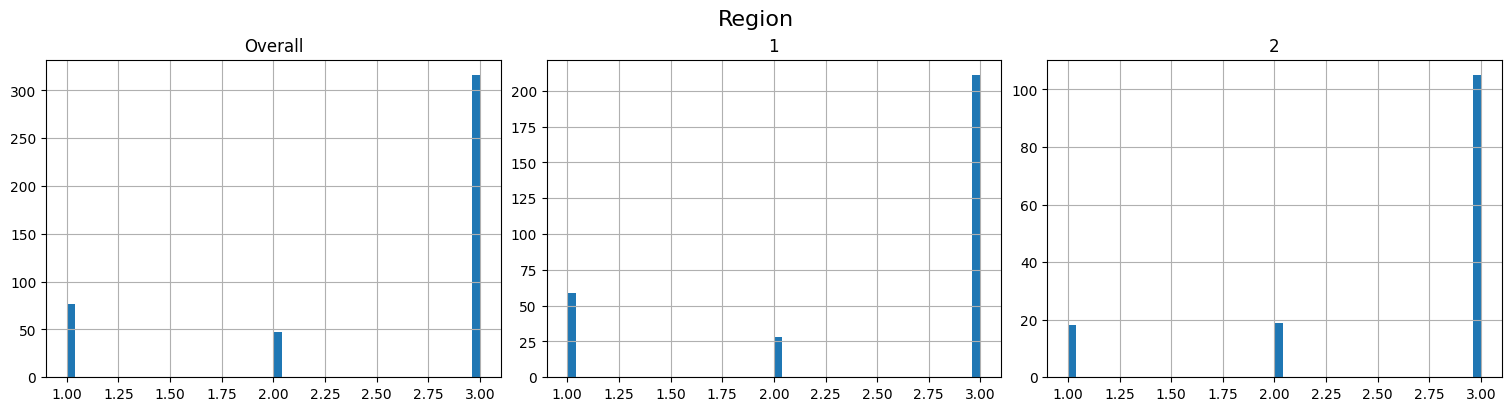

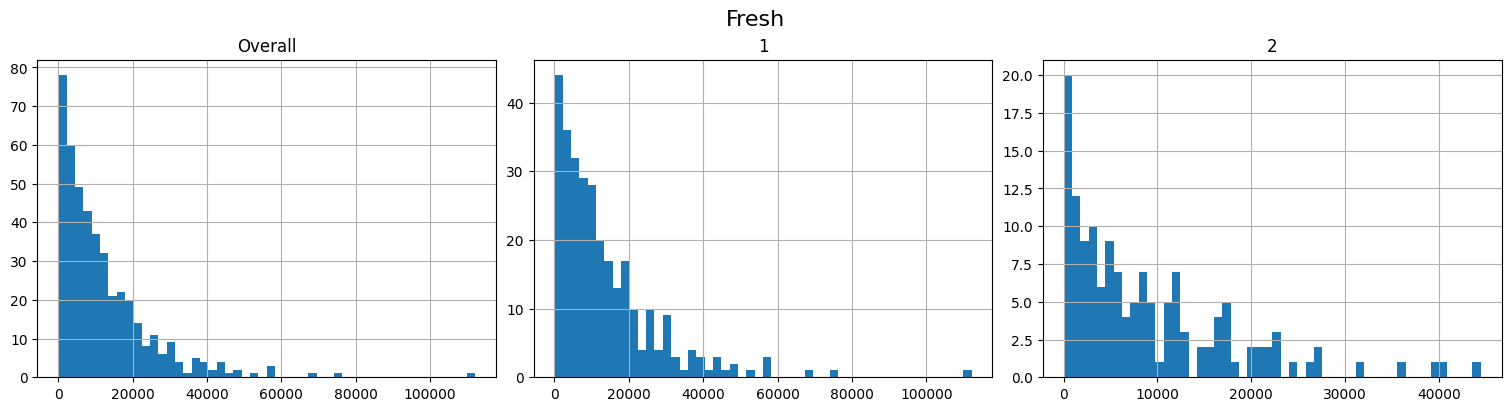

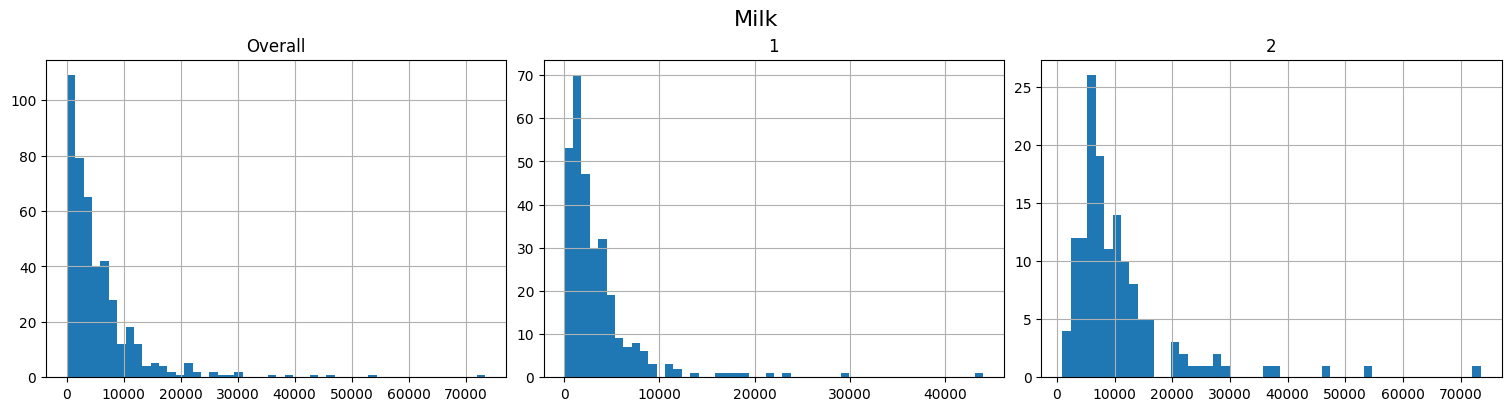

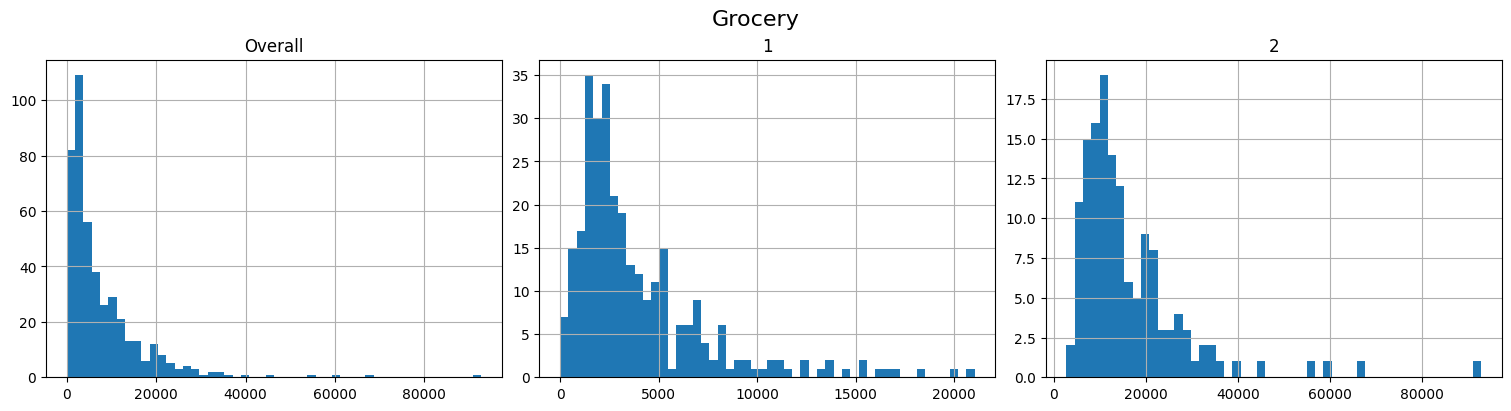

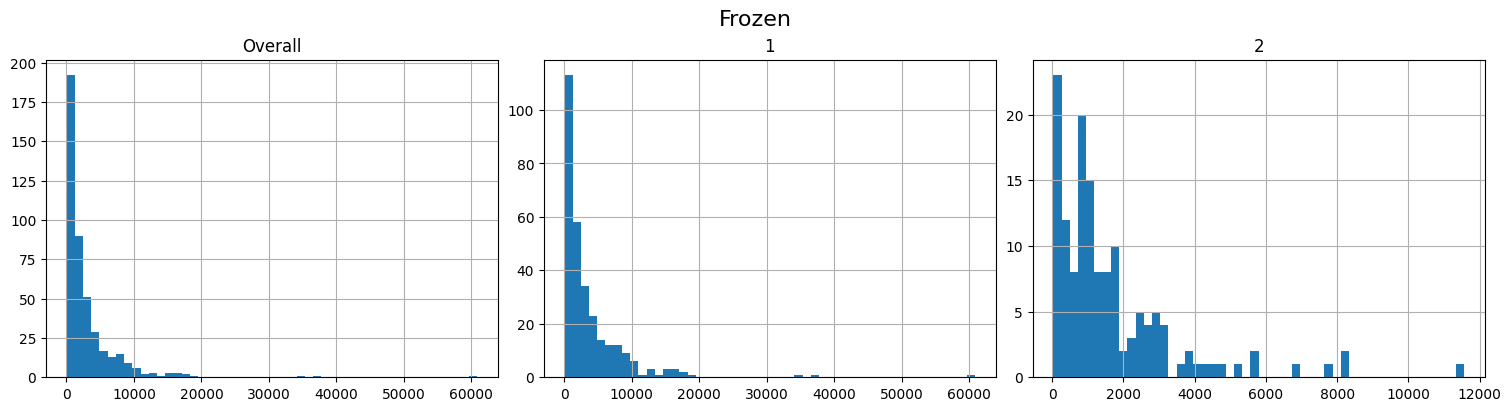

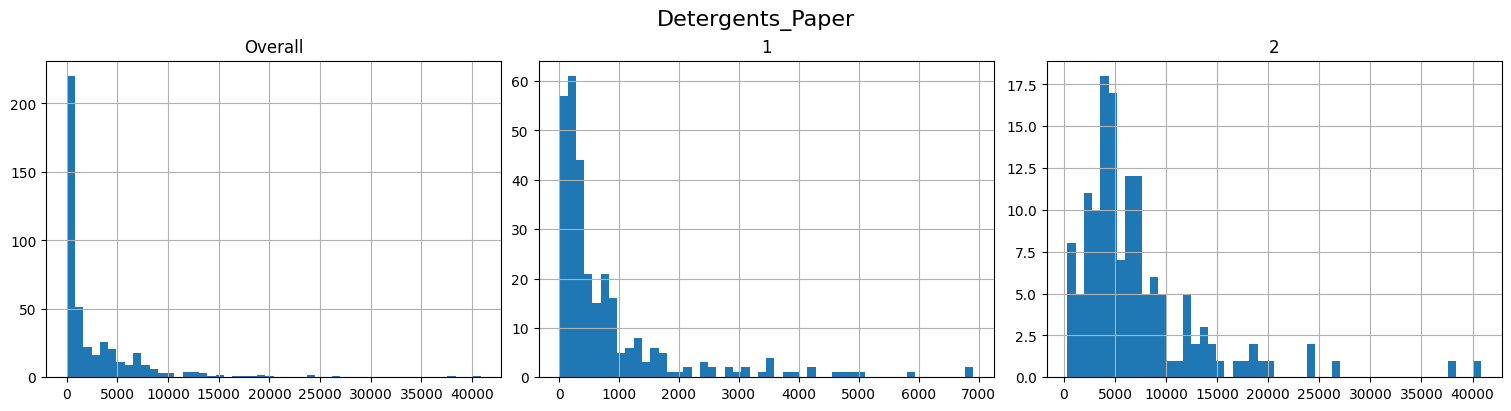

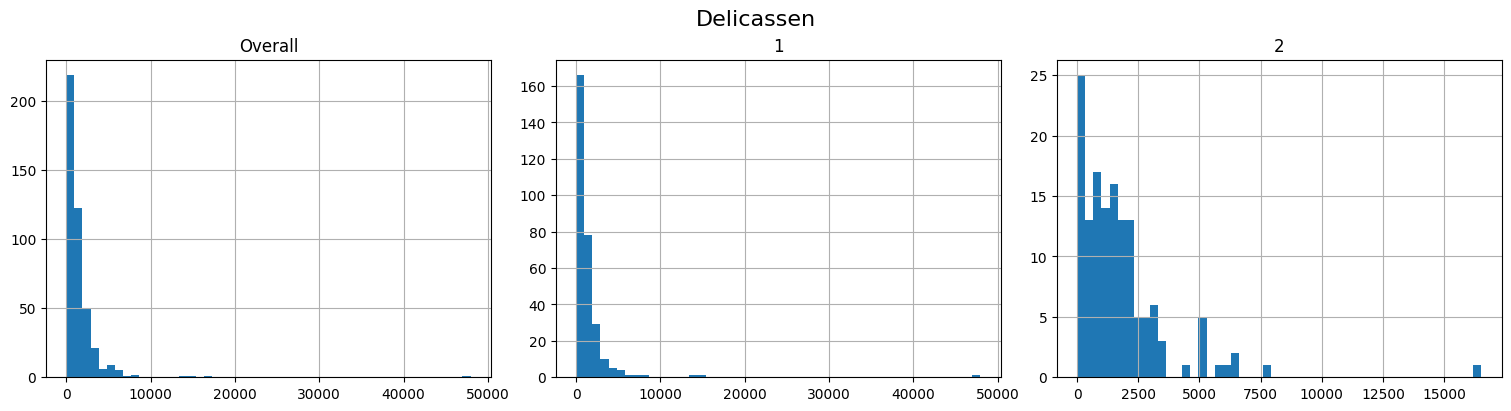

In [8]:
# print histogram plots for each channel
plot_hists(df, 'Channel', bin_size=50)

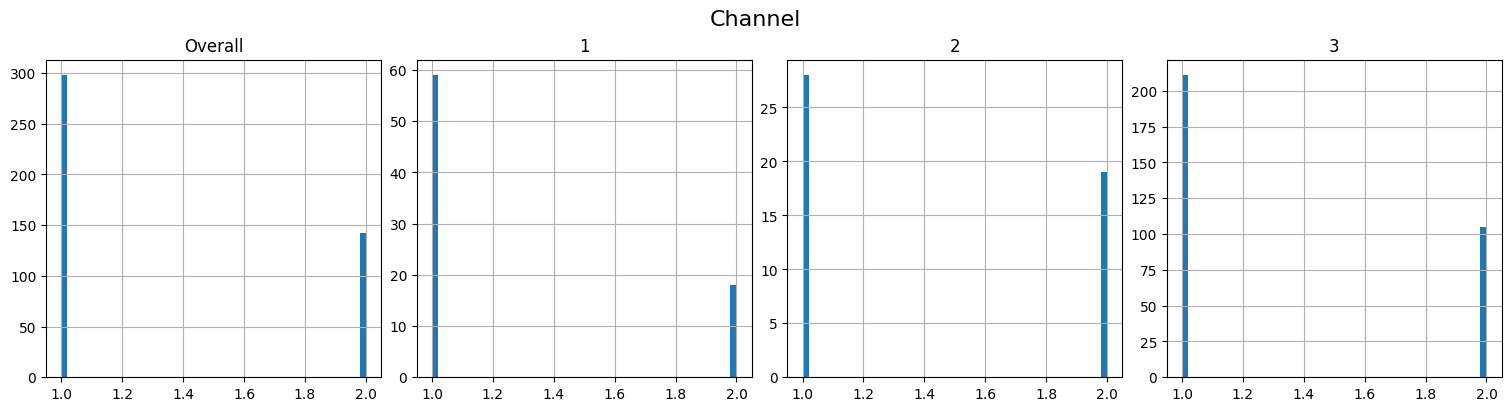

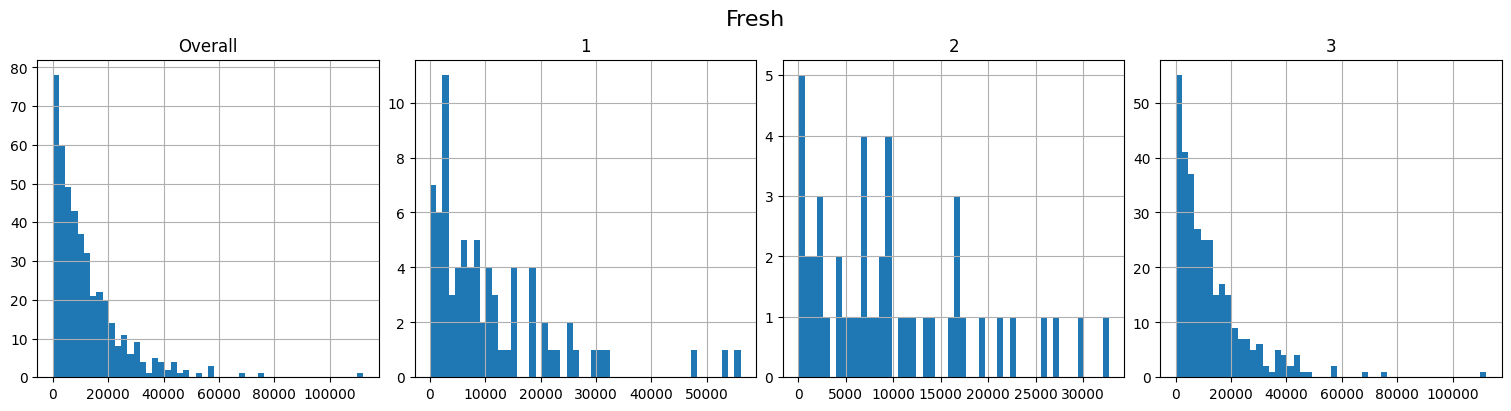

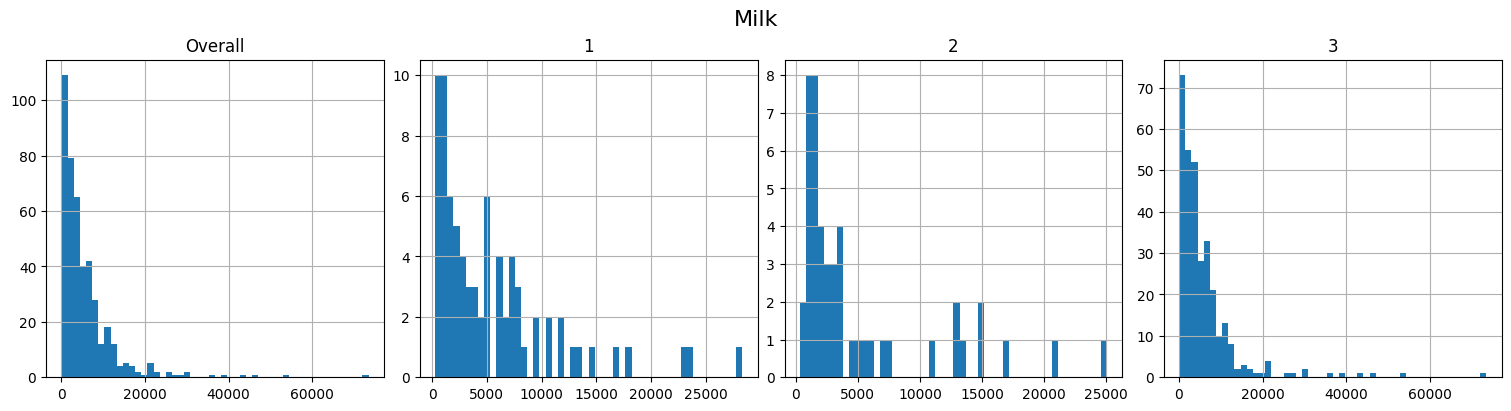

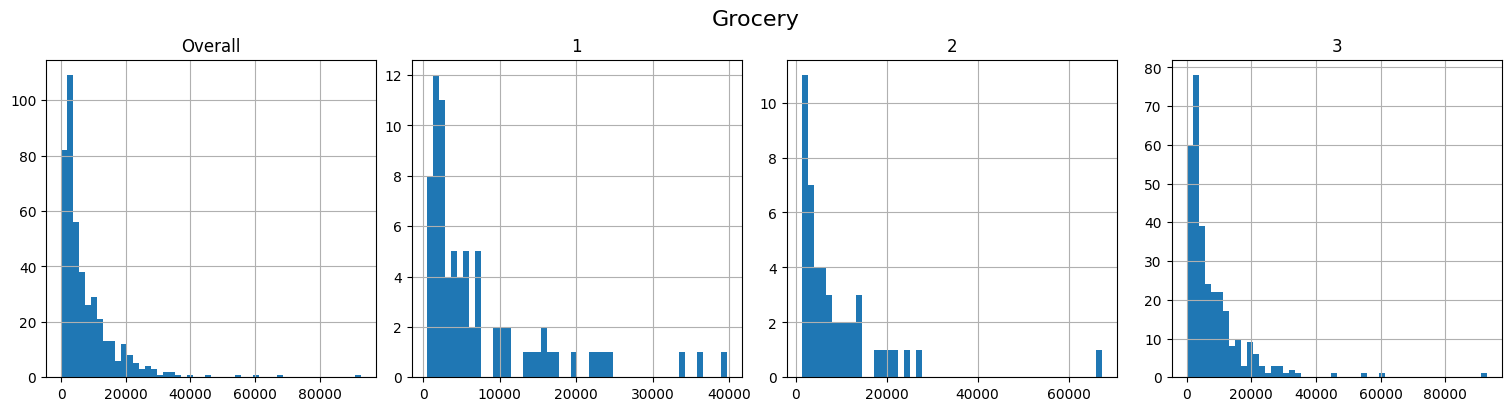

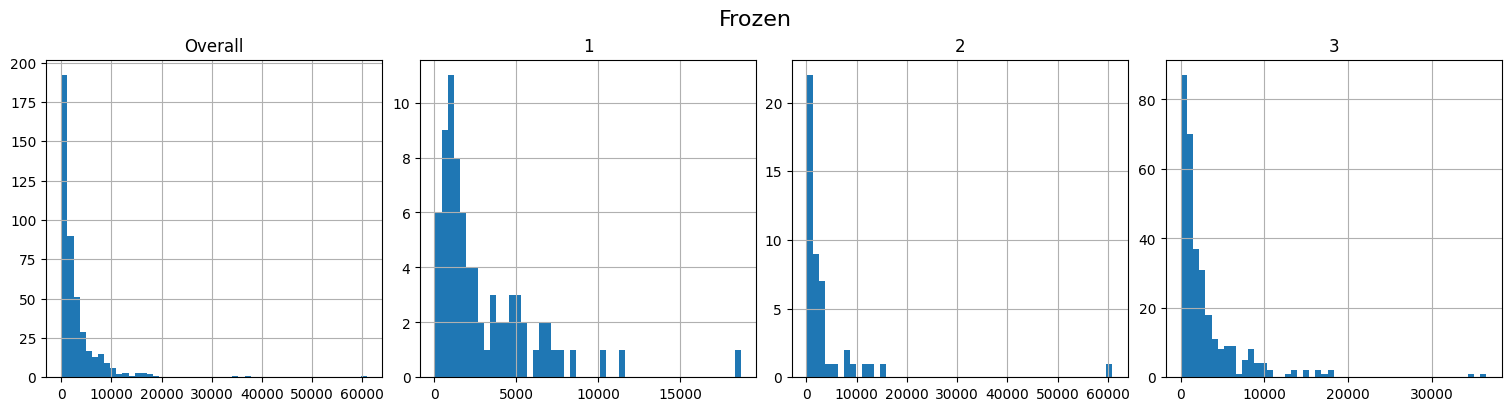

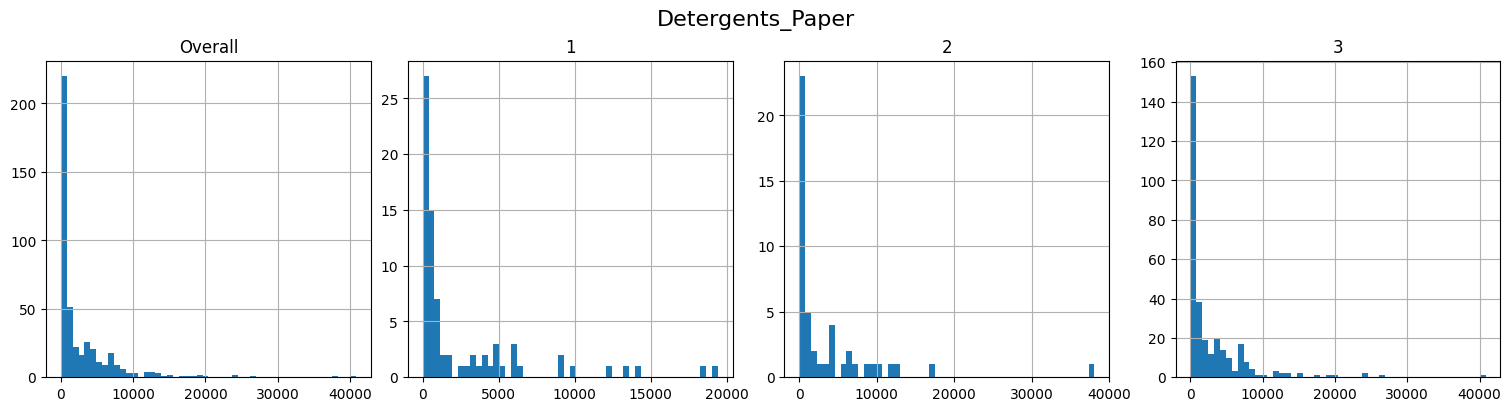

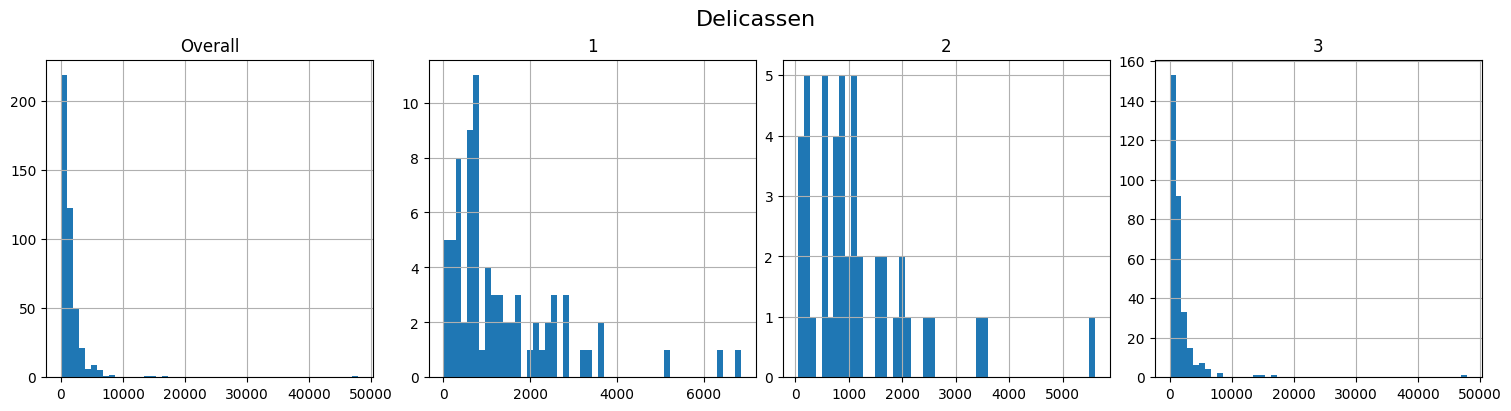

In [9]:
# print histogram plots for each region
plot_hists(df, 'Region', bin_size=50)

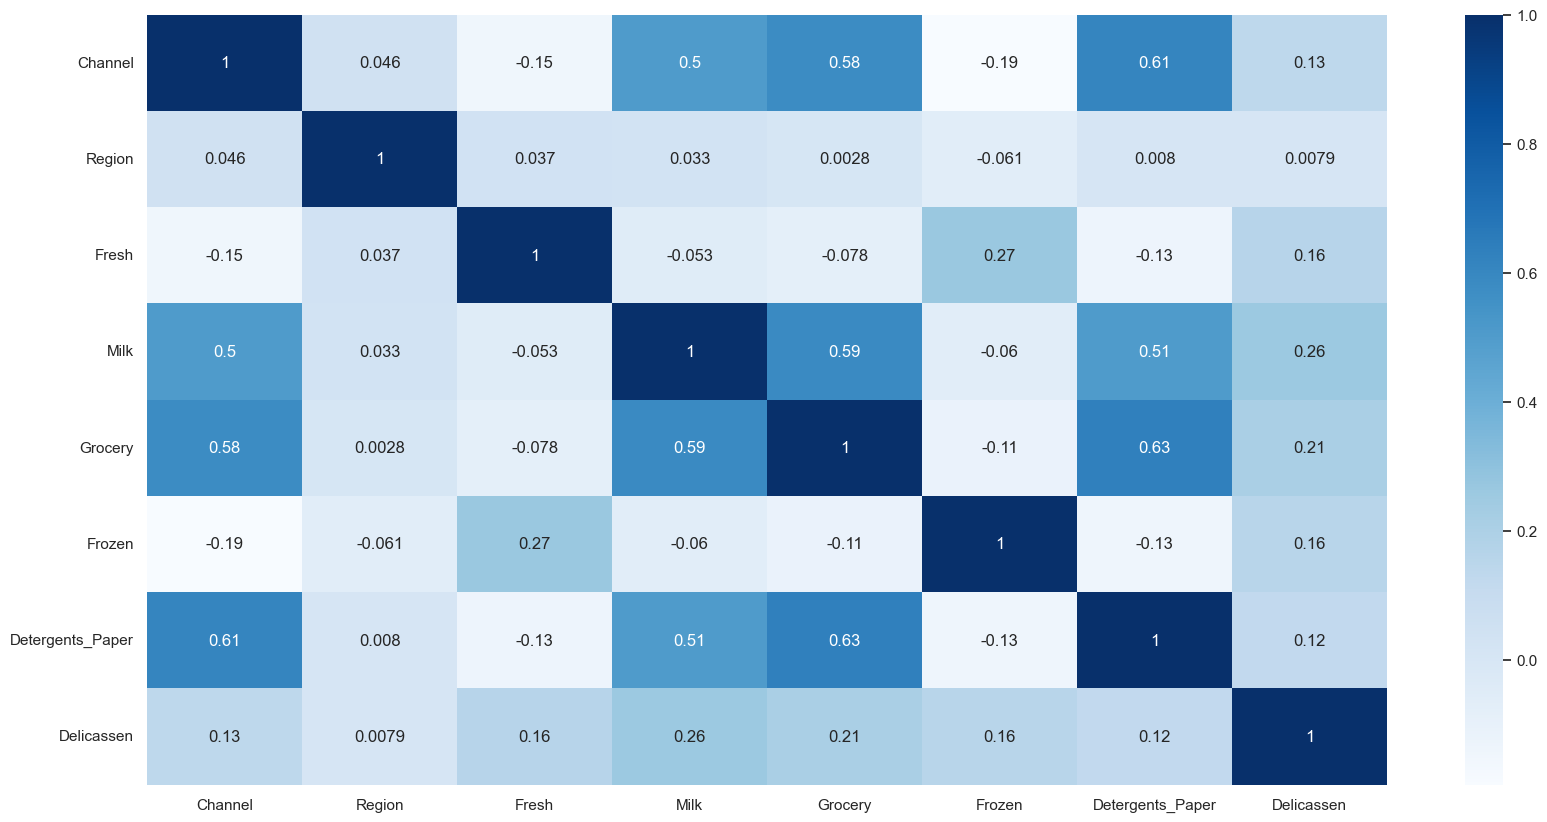

In [10]:
# Create a correlation matrix, using Kendall-Tau method since data doesn't follow normal distribution
df_corr = df.corr(method='kendall', numeric_only=True)

# Display a heatmap of the correlation matrix
sns.set(rc={"figure.figsize":(20, 10)})
sns.heatmap(df_corr, annot=True, annot_kws={'size': 12}, cmap='Blues')
plt.show()

In [11]:
# create a dataframe with outliers removed for modeling since the data seems to be heavily right-skewed
df_no_outliers = df.copy(deep=True)

In [12]:
# make a dict of outlier values using IQR for each column
outliers = {}
for col in df.drop(['Channel', 'Region'], axis=1).columns:
    outliers.update({col : df[col].quantile(0.75) + 1.5*(df[col].quantile(0.75) - df[col].quantile(0.25))})

In [13]:
# drop rows where outliers exist
for key in outliers.keys():
    df_no_outliers = df_no_outliers.loc[(df_no_outliers[key] <= outliers[key])]

In [14]:
# reset the index
df_no_outliers.reset_index(drop=True, inplace=True)

# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

In [15]:
# import KMeans from scikit-learn
from sklearn.cluster import KMeans

In [16]:
# transform the data (channel and region left out as they are categorical)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(df_no_outliers.drop(['Channel', 'Region'], axis=1))

In [17]:
# function for plotting inertia, original code snippet taken from the Centroid Model Tutorial notebook
def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=21)
        km.fit(X)
        distortions.append(km.inertia_)
        
    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.xticks(np.arange(1, max_clusters+1, 1)) # added to ensure each x point is plotted, otherwise floating point intervals may show instead
    plt.ylabel('Distortion')
    plt.show()

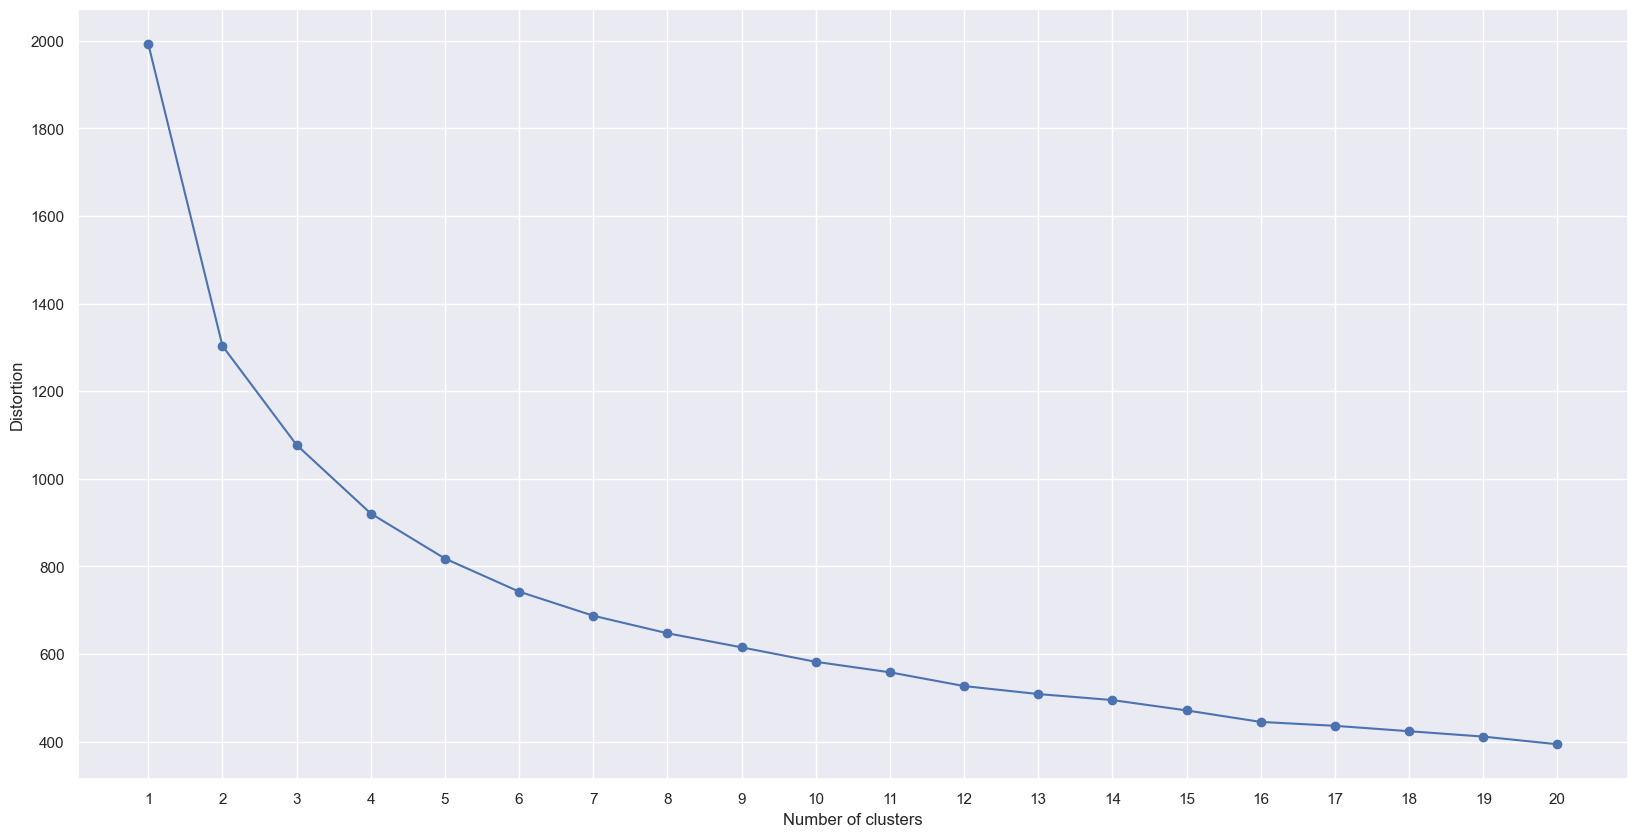

In [18]:
# plot the elbow plot

plot_distortion(X, max_clusters=20)

In [19]:
# function to plot clusters, original code snippet taken from the Centroid Model Tutorial notebook
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []
    
    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))
        
        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')
        
    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

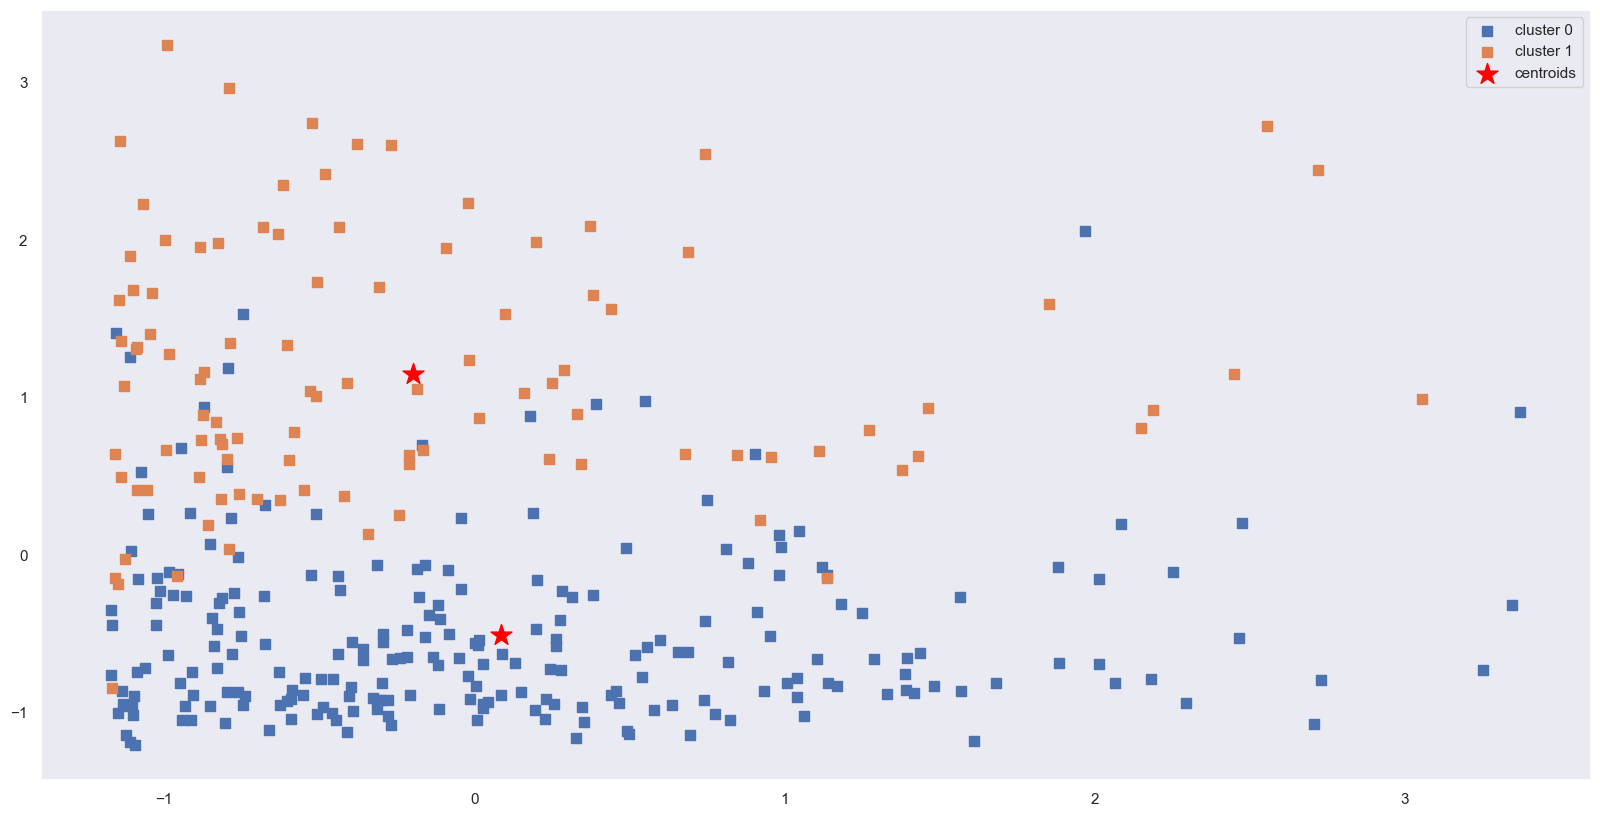

In [20]:
# fit a K-means model using 2 clusters
km = KMeans(n_clusters=2, n_init=10, random_state=0)

# fit and predict
y_km = km.fit_predict(X)

# plot the result
plot_clusters(X, y_km, plt_cluster_centers=True)

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

In [21]:
# import the necessary library for creating dendrograms
import scipy.cluster.hierarchy as sch

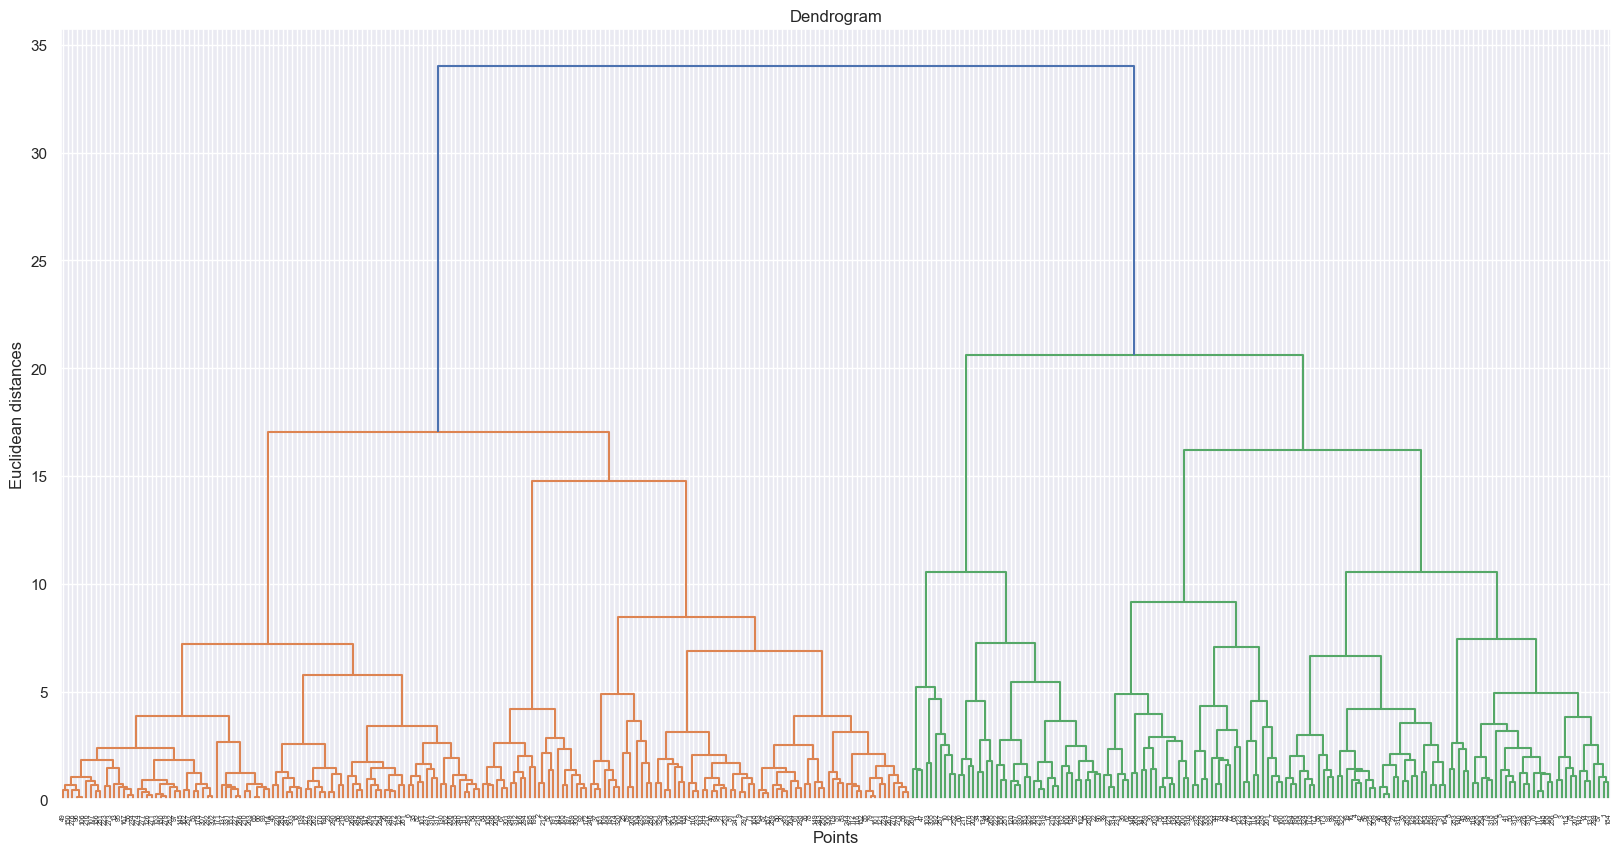

In [22]:
# plot the dendrogram, code snippet taken from the Heirarchical Model Tutorial notebook
plt.rcParams["figure.figsize"] = (20, 10)
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title("Dendrogram")
plt.ylabel("Euclidean distances")
plt.xlabel('Points')
plt.show()

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

In [23]:
# fit the data using PCA
from sklearn.decomposition import PCA

pca = PCA()

pca_results = pca.fit(X)

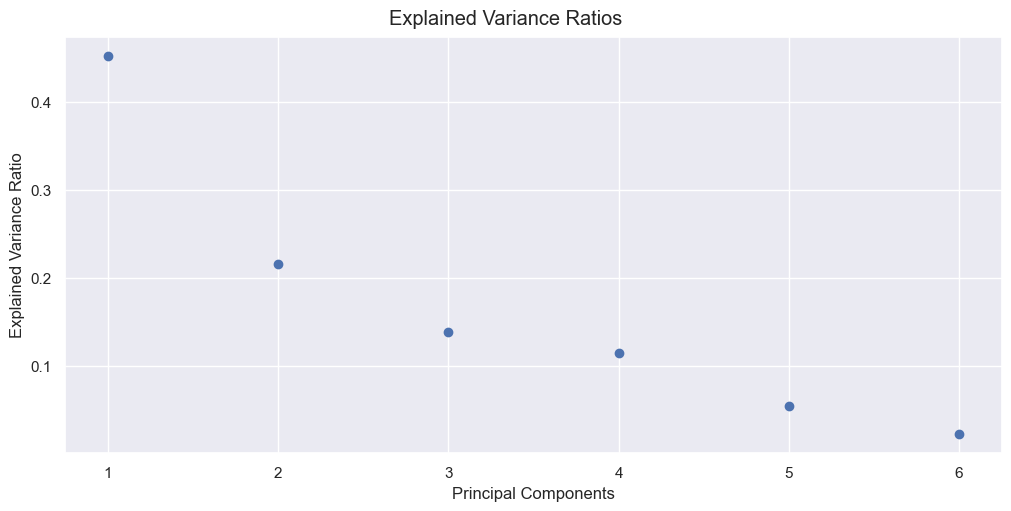

In [24]:
# plot the variance ratios
fig, ax = plt.subplots(figsize=(10,5), layout='constrained')
fig.suptitle("Explained Variance Ratios")
ax.scatter(x=[i+1 for i in range(len(pca_results.explained_variance_ratio_))],
            y=pca_results.explained_variance_ratio_)
ax.set_xlabel("Principal Components")
#ax.set_xticks([i+1 for i in range(len(pca_results.explained_variance_ratio_))],
#              labels=df.drop(['Channel', 'Region'], axis=1).columns.tolist())
plt.ylabel("Explained Variance Ratio")
plt.show()

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

 - A bulk of the orders tend to be within 10,000 m.u.
 - Certain types of orders seem to be correlated to each other, such as groceries and milk, groceries and detergent/paper, and milk and detergent/paper. Delicatassen has some weak correlation with groceries, milk, fresh and frozen products
 - Both the elbow method for K-means clustering and the dendrograms showed that two is the best number of clusters
 - PCA component 1 explains nearly 50% of the variance, and component 2 explains over 20% of the variance